### https://github.com/aliabdullah176

In [1]:
#import all libraries to be used
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### 1. Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [2]:
# import the data file
data1 = pd.read_csv("data.csv")
data1['PA'] = data1[['AB', 'BB','HBP','SH','SF']].sum(axis=1)
#data1['OBP'] = (data1['H'] + data1['BB'] + data1['HBP'])/(data1['AB']+data1['BB']+data1['HBP']+data1['SF']) # should be calculated after groupby
data1.head()
#pd.set_option('display.max_rows', 200)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,4.0
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN,122.0
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN,139.0
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN,133.0
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN,122.0


##### 2. Print out the dimensions and info about the dataframe you just created

In [3]:
#dimensions of the data
data1.shape

(102816, 26)

In [4]:
#summary statistics
data1.describe(include='all')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
count,102816,102816,102816,102816.000000,102816.000000,102816.000000,102816,102079,102816.000000,102816.000000,...,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000,102816.000000
unique,18915,2333,9751,NaN,NaN,NaN,149,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,mcguide01,Mike,Smith,NaN,NaN,NaN,CHN,NL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,31,2570,754,NaN,NaN,NaN,4863,52134,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1932.991869,1964.262313,1.077838,NaN,NaN,51.343439,141.905511,...,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018,158.842369
std,NaN,NaN,NaN,87.105524,38.856297,0.284366,NaN,NaN,47.121658,184.654492,...,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153,207.375004
min,NaN,NaN,NaN,0.000000,1871.000000,1.000000,NaN,NaN,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1905.000000,1934.000000,1.000000,NaN,NaN,13.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,NaN,NaN,NaN,1945.000000,1973.000000,1.000000,NaN,NaN,34.000000,49.000000,...,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
75%,NaN,NaN,NaN,1969.000000,1998.000000,1.000000,NaN,NaN,80.000000,231.000000,...,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000,257.000000


In [5]:
#datatypes of all variables
data1.dtypes

playerID      object
nameFirst     object
nameLast      object
birthYear      int64
yearID         int64
stint          int64
teamID        object
lgID          object
G              int64
AB             int64
R              int64
H              int64
2B             int64
3B             int64
HR             int64
RBI          float64
SB           float64
CS           float64
BB             int64
SO           float64
IBB          float64
HBP          float64
SH           float64
SF           float64
GIDP         float64
PA           float64
dtype: object

##### 3. How many players have hit 40 or more HRs in one single season? (Number only)

In [6]:
q3a = data1[['playerID','HR','yearID']].groupby(['playerID','yearID'], as_index=False).agg({"HR":"sum"})
q3a[q3a['HR']>=40]['playerID'].nunique()

142

##### 4. How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [7]:
q4a = data1[['playerID','HR','nameFirst','nameLast']].groupby(['playerID','nameFirst','nameLast'], as_index=False).agg({"HR":"sum"})
#Sorted by highest HR first
q4a[q4a['HR']>=600].sort_values('HR', ascending = False).drop('playerID', axis=1)

,nameFirst,nameLast,HR
1542,Barry,Bonds,762
1,Hank,Aaron,755
14865,Babe,Ruth,714
14528,Alex,Rodriguez,696
10857,Willie,Mays,660
6633,Ken,Griffey,630
17004,Jim,Thome,612
16103,Sammy,Sosa,609


##### 5.	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [8]:
q5a = data1[['playerID','HR','yearID','2B','3B','H']].groupby(['playerID','yearID'], as_index=False).agg({"HR":"sum", "2B" :"sum","H":"sum","3B":"sum"})
q5a[(q5a["HR"]>=30) & (q5a["H"]>=200) & (q5a["3B"]>=10) & (q5a["2B"]>=40) ]['playerID'].nunique()

11

###### 6. How many players' seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs

In [9]:
q6a = data1[['playerID','yearID','nameFirst','nameLast','SB']].groupby(['playerID','yearID'], as_index=False).agg({"SB":"sum"})
q6a[q6a['SB']>100].sort_values('SB', ascending=False)

,playerID,yearID,SB
62362,nicolhu01,1887,138.0
37059,henderi01,1982,130.0
48268,lathaar01,1887,129.0
9713,brocklo01,1974,118.0
16703,comisch01,1887,117.0
89859,wardjo01,1887,111.0
34649,hamilbi01,1889,111.0
34651,hamilbi01,1891,111.0
16351,colemvi01,1985,110.0
48269,lathaar01,1888,109.0


##### 7.	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [10]:
q7 = data1[(data1['yearID']>=1960) & (data1['yearID'] < 1970)]
q7a = q7[['playerID','nameFirst','nameLast','HR']].groupby(['playerID'], as_index=False).agg({"HR":"sum"})
q7a[(q7a['HR']>=200)].sort_values('HR', ascending=False)

,playerID,HR
856,killeha01,393
0,aaronha01,375
1044,mayswi01,350
1372,robinfr02,316
1057,mccovwi01,300
751,howarfr01,288
279,cashno01,278
70,bankser01,269
1009,mantlmi01,256
283,cepedor01,254


##### 8. Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [11]:
q8a = data1[['playerID','HR','nameFirst','nameLast']].groupby(['playerID','nameFirst','nameLast'], as_index=False).agg({"HR":"sum"})
#Sorted by highest HR first
q8a.nlargest(1, columns='HR')

,playerID,nameFirst,nameLast,HR
1542,bondsba01,Barry,Bonds,762


##### 9 Who had the most hits (H) in the 1970s? (Dataframe)

In [12]:
q9 = data1[(data1['yearID'])>=1970 & (data1['yearID'] < 1980)]
q9a = q9[['playerID','nameFirst','nameLast','H']].groupby(['playerID','nameFirst','nameLast'], as_index=False).agg({"H":"sum"})
q9a.nlargest( 1,columns = 'H')

,playerID,nameFirst,nameLast,H
14719,rosepe01,Pete,Rose,4256


##### 10.	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)

OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies).

H + BB + HBP / AB + BB + SF

PA = AB + BB + HBP + SH + SF

In [13]:
q10 = data1[(data1['yearID']==1977)&(data1['PA']>=500)]
q10a = q10[['playerID','nameFirst','nameLast','H','BB','HBP','AB','SF','PA']].groupby(['playerID','nameFirst','nameLast'], as_index = False).sum()
q10a['OBP'] = (q10a['H'] + q10a['BB'] + q10a['HBP'])/(q10a['AB']+q10a['BB']+q10a['HBP']+q10a['SF'])
q10a.nlargest(5, columns='OBP').drop(['playerID','AB', 'BB','HBP','H','SF','PA'], axis=1)

,nameFirst,nameLast,OBP
21,Rod,Carew,0.448773
115,Ken,Singleton,0.437788
118,Reggie,Smith,0.426910
55,Mike,Hargrove,0.420312
86,Joe,Morgan,0.417054


##### 11. Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [14]:
q11 = data1[(data1['yearID']==2013)&(data1['PA']>=300)]
q11a = q11.groupby(['playerID','nameFirst','nameLast'], as_index=False).sum()
q11a['BA'] = q11a['H']/q11a['AB']
q11a.head(1)
q11a[['nameFirst','nameLast','BA']].nlargest(8, columns = 'BA')

,nameFirst,nameLast,BA
35,Miguel,Cabrera,0.347748
202,Hanley,Ramirez,0.345395
53,Michael,Cuddyer,0.331288
149,Joe,Mauer,0.323596
245,Mike,Trout,0.322581
118,Chris,Johnson,0.321012
82,Freddie,Freeman,0.319419
195,Yasiel,Puig,0.319372


##### 12.Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)

In [15]:
q12 = data1[(data1['yearID']<1950)&(data1['yearID']>=1940)]
q12a = q12.groupby(['playerID','nameFirst','nameLast'], as_index=False).agg({'H':'sum'})
q12a.nlargest(5,'H')

# code for if we wanted to check leaders for each year separately, there is some confusion regarding this

#q12 = data1[(data1['yearID']<1950)&(data1['yearID']>=1940)]
#q12a.sort_values('H',ascending=False).groupby('yearID').head(2).drop('playerID', axis=1).sort_values(['yearID','H'], ascending=[True, False]
#q12a = q12.groupby(['playerID','nameFirst','nameLast','yearID'], as_index=False).agg({'H':'sum'})
#q12a.sort_values('H',ascending=False).groupby('yearID').head(3).drop('playerID', axis=1).sort_values(['yearID','H'], ascending=[True, False])

,playerID,nameFirst,nameLast,H
138,boudrlo01,Lou,Boudreau,1578
427,elliobo01,Bob,Elliott,1563
1576,walkedi02,Dixie,Walker,1512
1103,musiast01,Stan,Musial,1432
390,doerrbo01,Bobby,Doerr,1407


##### 13.Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [36]:
q13 = data1.groupby(['playerID','nameFirst','nameLast','yearID'], as_index=False).sum()
q13_max = data1[['yearID','H']].groupby('yearID', as_index=False).max()
q13_max.columns = ['yearID','Hmax']
q13_max
q13a = pd.merge(q13, q13_max, on = 'yearID')
q13a['check'] = q13a.apply(lambda x : 1 if x.H == x.Hmax else 0, axis=1)
#q13a[q13a['playerID']=='cobbty01'].sort_values('yearID', ascending = True)
q13b = q13a[q13a['check']>0].groupby(['playerID','nameFirst','nameLast'], as_index=False).count()[['nameFirst','nameLast','H']].sort_values(['H','nameFirst'], ascending=False).head(1)
q13b['totalHits'] = data1[data1['playerID']=='cobbty01']['H'].sum()
q13b
# Cobb got the most hits in a season in 7 separate seasons.

,nameFirst,nameLast,H,totalHits
23,Ty,Cobb,7,4189


##### 14. Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe

In [17]:
q14 = data1.groupby(['playerID','nameFirst','nameLast'], as_index=False).agg({"G":"sum"})
q14[['nameFirst','nameLast','G']].nlargest(5,'G')

,nameFirst,nameLast,G
14719,Pete,Rose,3562
18728,Carl,Yastrzemski,3308
1,Hank,Aaron,3298
7383,Rickey,Henderson,3081
3155,Ty,Cobb,3035


##### 15.	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [18]:
q15 = data1.groupby(['playerID'], as_index=False).sum()
q15[(q15['H']>=3000) &(q15['HR']>=500)]['playerID'].nunique()

5

##### 16.How many HRs were hit during the entire 1988 season?

In [19]:
data1[data1['yearID']==1988]['HR'].sum()

3180

##### 17. Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average

In [20]:
q17 = data1[data1['playerID']=="boggswa01"]
q17a = q17.groupby(['yearID','nameFirst','nameLast'], as_index=False).sum()
q17a['BA'] = q17a['H']/q17a['AB']
q17a[q17a['AB']>=500][['nameFirst','nameLast','BA','yearID']].nlargest(3, columns = 'BA')

,nameFirst,nameLast,BA,yearID
3,Wade,Boggs,0.367534,1985
6,Wade,Boggs,0.366438,1988
5,Wade,Boggs,0.362976,1987


###### 18. Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP

In [21]:
q18 = data1[(data1['yearID']==1995) & (data1['PA']>=400)]
q18a = q18.groupby(['playerID','nameFirst','nameLast'], as_index = False).sum()
q18a['OBP'] = (q18a['H'] + q18a['BB'] + q18a['HBP'])/(q18a['AB']+q18a['BB']+q18a['HBP']+q18a['SF'])
q18a[q18a['PA']>=400].nlargest(10, 'OBP')[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
103,Edgar,Martinez,0.478873
147,Frank,Thomas,0.454405
107,Mark,McGwire,0.440758
148,Jim,Thome,0.438061
18,Barry,Bonds,0.431496
133,Tim,Salmon,0.429467
42,Chili,Davis,0.429119
100,Dave,Magadan,0.427553
91,Chuck,Knoblauch,0.424483
117,Tim,Naehring,0.414729


##### 19. Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs

In [22]:
q19 = data1[(data1['yearID']==1922)|(data1['yearID']==1925)|(data1['yearID']==1926)|(data1['yearID']==1928)]
q19[['playerID','nameFirst','nameLast','3B']].groupby(['playerID','nameFirst','nameLast'], as_index = False).sum().nlargest(1,'3B')

,playerID,nameFirst,nameLast,3B
1011,walkecu01,Curt,Walker,59


##### 20. How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?

In [23]:
q20 = data1[['playerID','nameFirst','nameLast','HR','SB','yearID']].groupby(['playerID','nameFirst','nameLast','yearID'], as_index=False).sum()
q20[(q20['HR']>=30) & (q20['SB']>=30)]['playerID'].nunique()



38

##### 21. Who had the highest OBP in 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [24]:
q21 = data1[(data1['yearID']==1986)&(data1['AB']>=400)]
q21a = q21.groupby(['playerID','nameFirst','nameLast'], as_index = False).sum()
q21a['OBP'] = (q21a['H'] + q21a['BB'] + q21a['HBP'])/(q21a['AB']+q21a['BB']+q21a['HBP']+q21a['SF'])
q21a.nlargest(1, 'OBP')[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
11,Wade,Boggs,0.45283


###### 22. same question but for 1997 and only in the NL (check league ID)? 

In [25]:
q22 = data1[(data1['yearID']==1997)&(data1['AB']>=400)&(data1['lgID']=='NL')]
q22a = q22.groupby(['playerID','nameFirst','nameLast'], as_index = False).sum()
q22a['OBP'] = (q22a['H'] + q22a['BB'] + q22a['HBP'])/(q22a['AB']+q22a['BB']+q22a['HBP']+q22a['SF'])
q22a.nlargest(1, 'OBP')[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
74,Larry,Walker,0.451807


##### 23. Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

In [26]:
q23 = data1[(data1['yearID']==2012)]
q23_lg_avg_a = data1.groupby(['playerID','lgID','nameFirst','nameLast'], as_index=False).sum()
q23_lg_avg_a
q23_lg_avg_b = q23_lg_avg_a.groupby('lgID', as_index=False).agg({'HR':'mean'})
q23_lg_avg_b
q23_lg_avg_b.columns = ['lgID','HRavg']
q23_lg_avg_b.head(10)
q23a = pd.merge(q23,q23_lg_avg_b, on='lgID')
q23a.head(-500)
q23a['check'] = q23a.apply(lambda x : 1 if x.HR > x.HRavg else 0, axis=1)
q23a.head(1000)
q23b = q23a[q23a['PA']>=500][['nameFirst','nameLast','HR','HRavg','check']]
q23b[q23b['check']==True].drop(['check','HRavg'], axis=1).sort_values('HR',ascending=False)

,nameFirst,nameLast,HR
74,Miguel,Cabrera,44
225,Curtis,Granderson,43
237,Josh,Hamilton,43
171,Edwin,Encarnacion,42
728,Ryan,Braun,41
166,Adam,Dunn,41
1310,Giancarlo,Stanton,37
45,Adrian,Beltre,36
641,Josh,Willingham,35
737,Jay,Bruce,34


##### 24. Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [27]:
q24 = data1
q24['age'] = q24['yearID'] - q24['birthYear']
q24a = q24.groupby(['playerID','nameFirst','nameLast','birthYear','yearID'], as_index=False).sum()
q24a[q24a['HR']>=50].nsmallest(1,'age')[['nameFirst','nameLast','HR','yearID']]

,nameFirst,nameLast,HR,yearID
26282,Prince,Fielder,50,2007


##### 25. Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs

In [28]:
q25 = data1
q25['age'] = q25['yearID'] - q25['birthYear']
q25['HR_total'] = q25.groupby('playerID')['HR'].cumsum()
q25a = q25[q25['HR_total'] >= 300]
q25a.groupby('playerID',as_index=False)['age','yearID'].min().sort_values(by="age").head(5)

,playerID,age,yearID
46,foxxji01,28,1935
98,ottme01,28,1937
105,pujolal01,28,2008
69,jonesan01,28,2005
111,rodrial01,28,2003


##### 26. Graph total HRs per season using bar graph

<Container object of 146 artists>

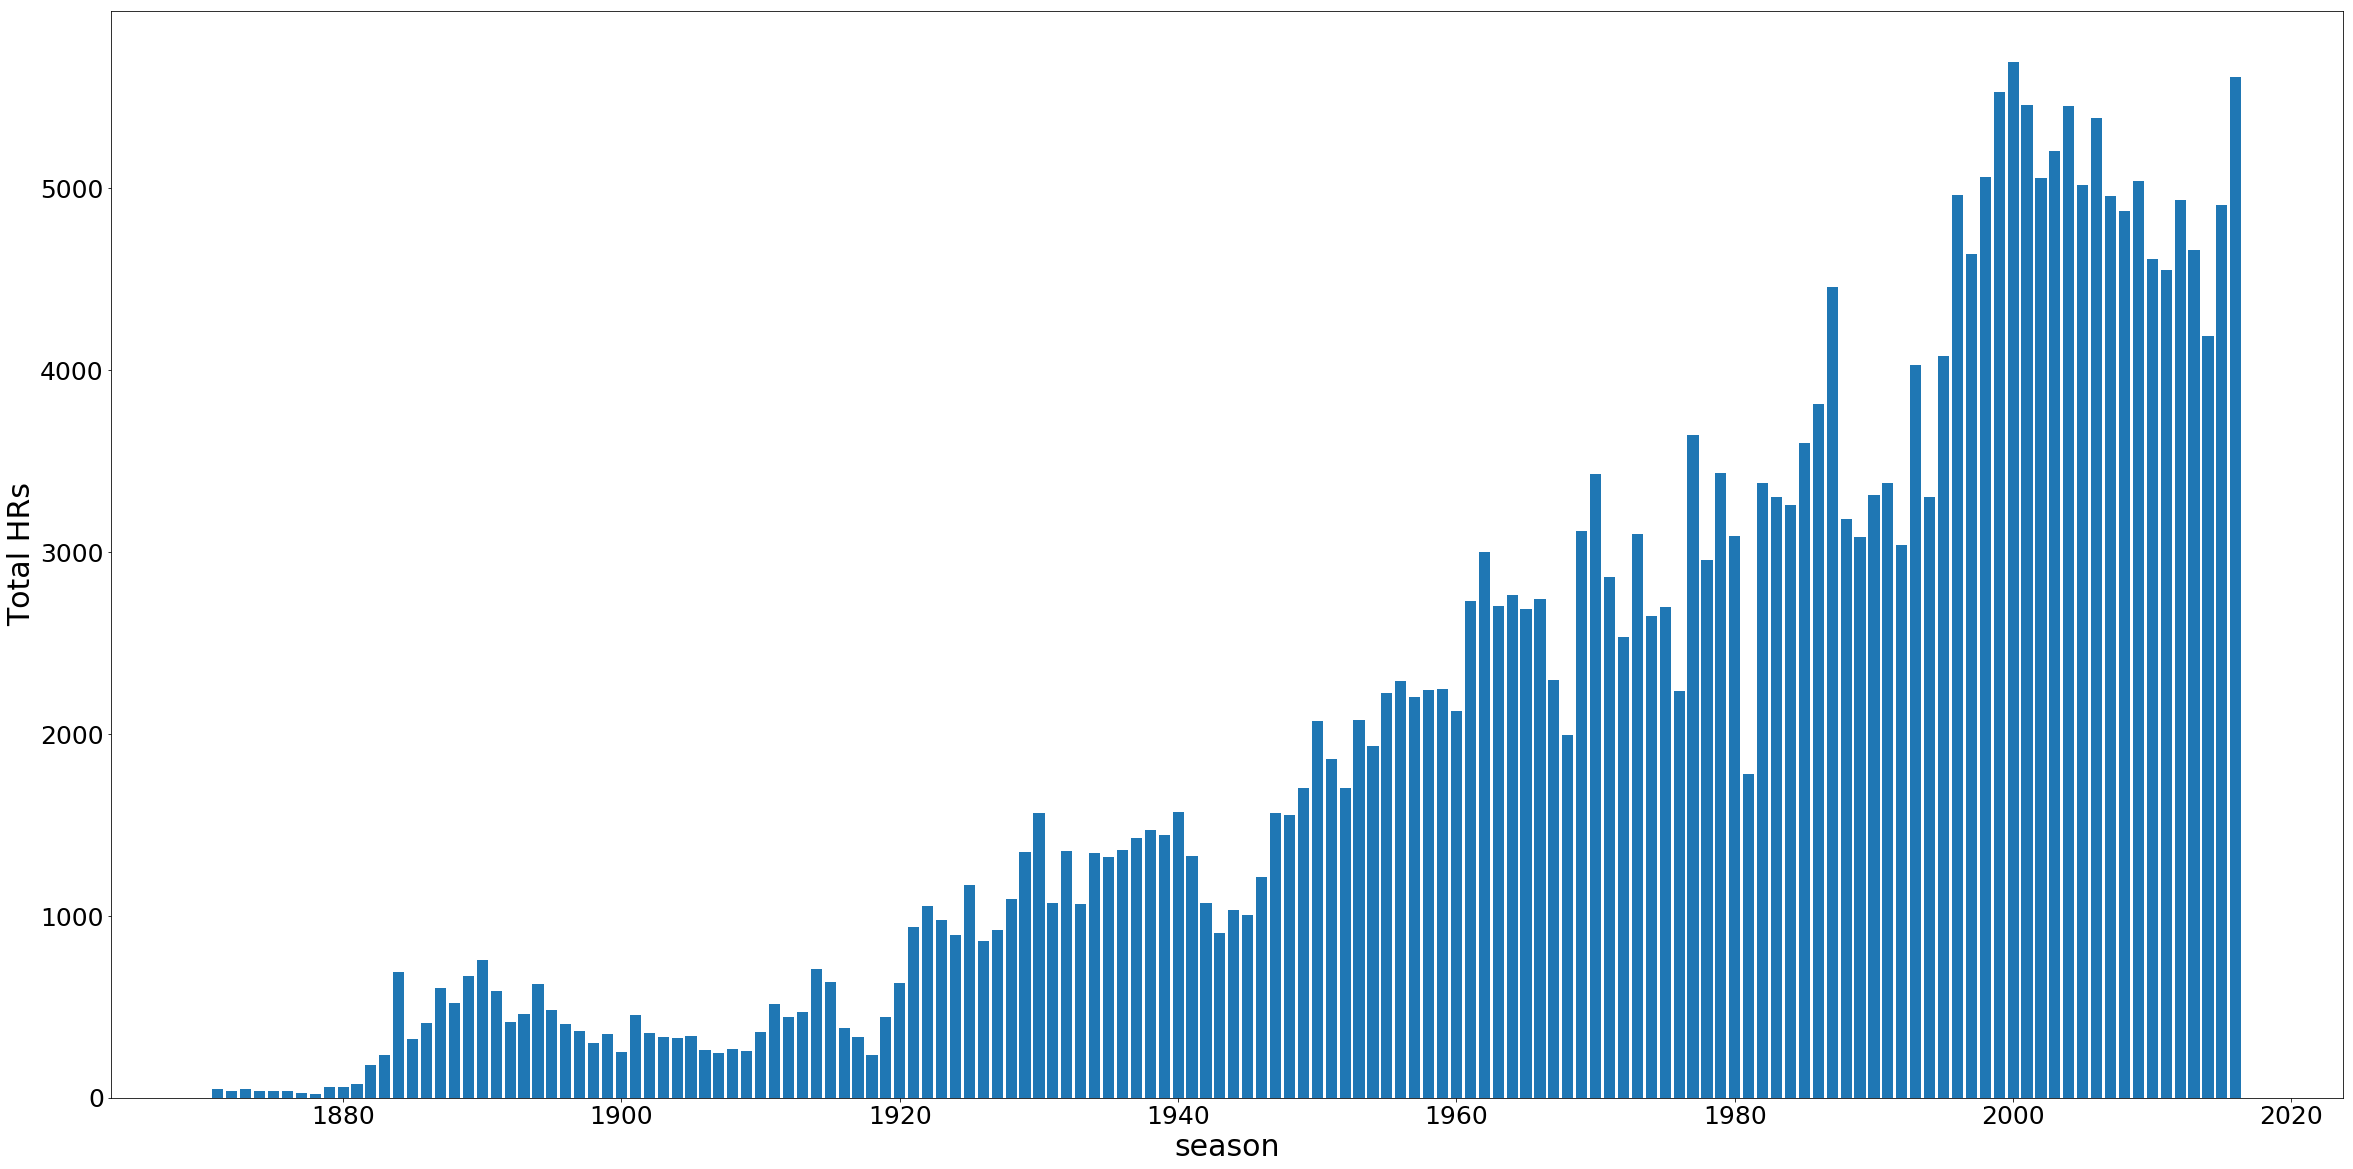

In [29]:
q26 = data1[['HR','yearID']].groupby(['yearID'], as_index = False).sum()
plt.figure(figsize=(40,20))
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
plt.xlabel("season", fontsize=30)
plt.ylabel("Total HRs", fontsize=30)
plt.bar(q26.yearID, q26.HR)


###### 27. Using a line graph please graph the average HRs per AB (think about this) per season

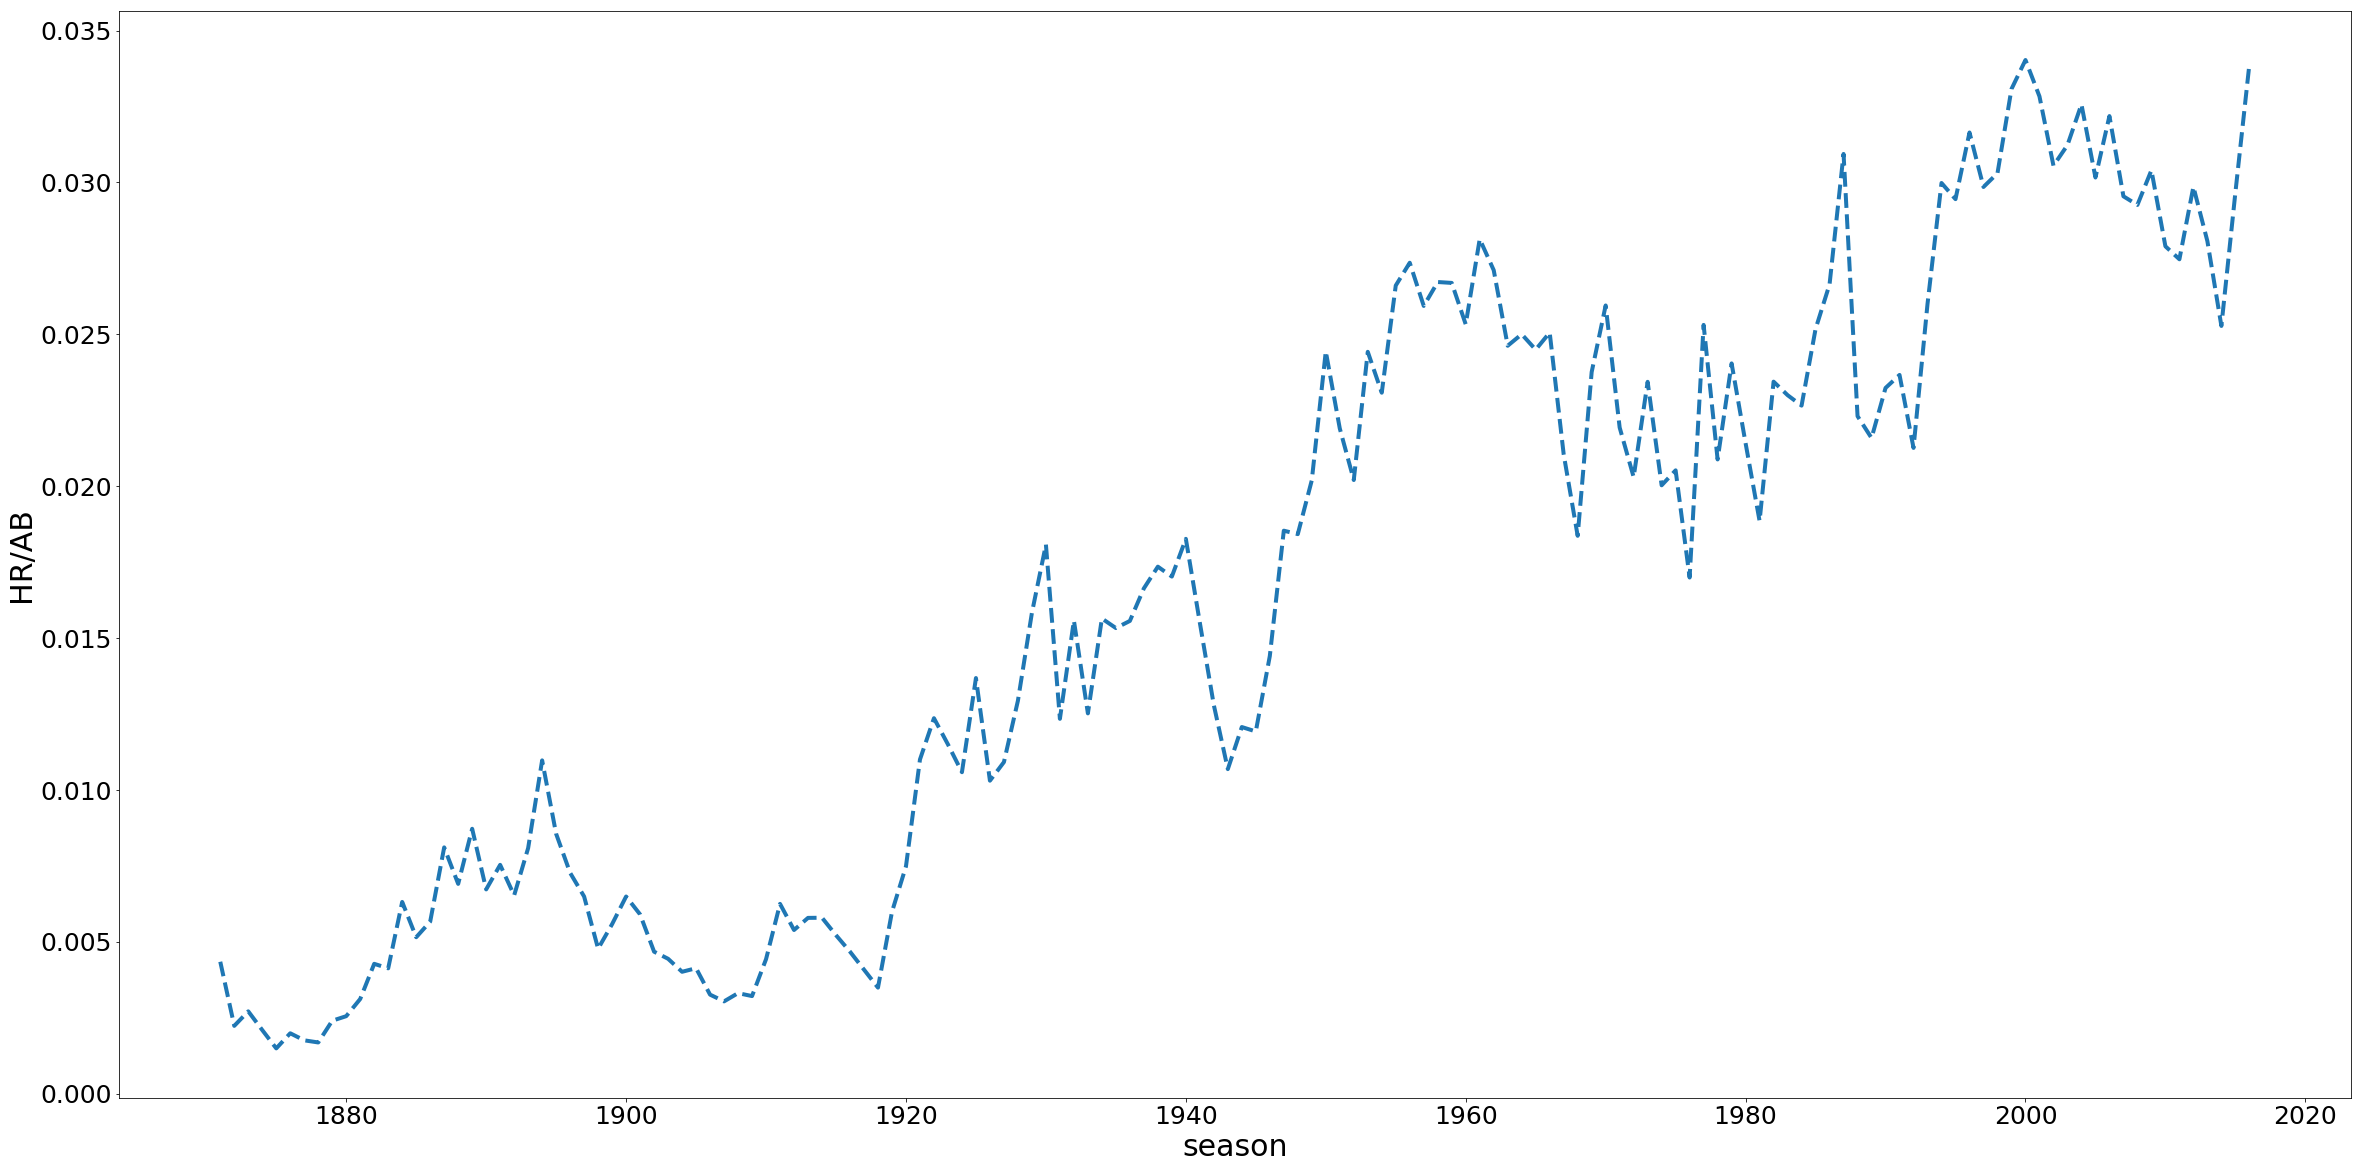

In [30]:
q27 = data1[['HR','AB','yearID']].groupby(['yearID'], as_index = False).sum()
q27['ratio'] = q27['HR']/q27['AB']
plt.figure(figsize=(40,20))
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
plt.xlabel("season", fontsize=30)
plt.ylabel("HR/AB", fontsize=30)
plt.plot(q27.yearID, q27.ratio, linestyle='dashed', linewidth=4)